# DIABETES PREDICTION

### Problem statement

#### The model should predict whether a patient has diabetes or does not have diabetes based on several diagnostic measurements, including Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age.

1. **Pregnancies** -- Number of pregnancies
2. **Glucose** -- Glucose level in blood
3. **BloodPressure** -- Blood pressure measurement
4. **SkinThickness** -- Thickness of the skin
5. **Insulin** -- Insulin level in blood
6. **BMI** -- Body mass index
7. **DiabetesPedigreeFunction** -- Diabetes percentage
8. **Age** -- Age
9. **Outcome** -- Final result (1: Yes, the individual has diabetes; 0: No, the individual does not have diabetes)

**Import necessary libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

**Load the dataset into a Pandas DataFrame**

In [2]:
df=pd.read_csv("diabetes.csv")

**Get the shape (number of rows and columns) of the DataFrame** 

In [3]:
 df.shape

(768, 9)

**Display the first few rows of the DataFrame**

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Display all the column names**

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Display information about the DataFrame**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Check for missing values**

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Duplicate values in each column**

In [8]:
df.duplicated().sum()

0

**Featues that are numerical**

In [9]:
numeric_feature = [ features for features in df.columns if df[features].dtype != "O"]
numeric_feature

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

**Summary statistics**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


But we can see Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, and BMI features have minimum value 0. That does not make any sense. We will check each feature one by one.

**Featues that have min values as zeros**

In [11]:
Features_min_zero=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

**Histogram plot with Kde for features with min values as zeros**

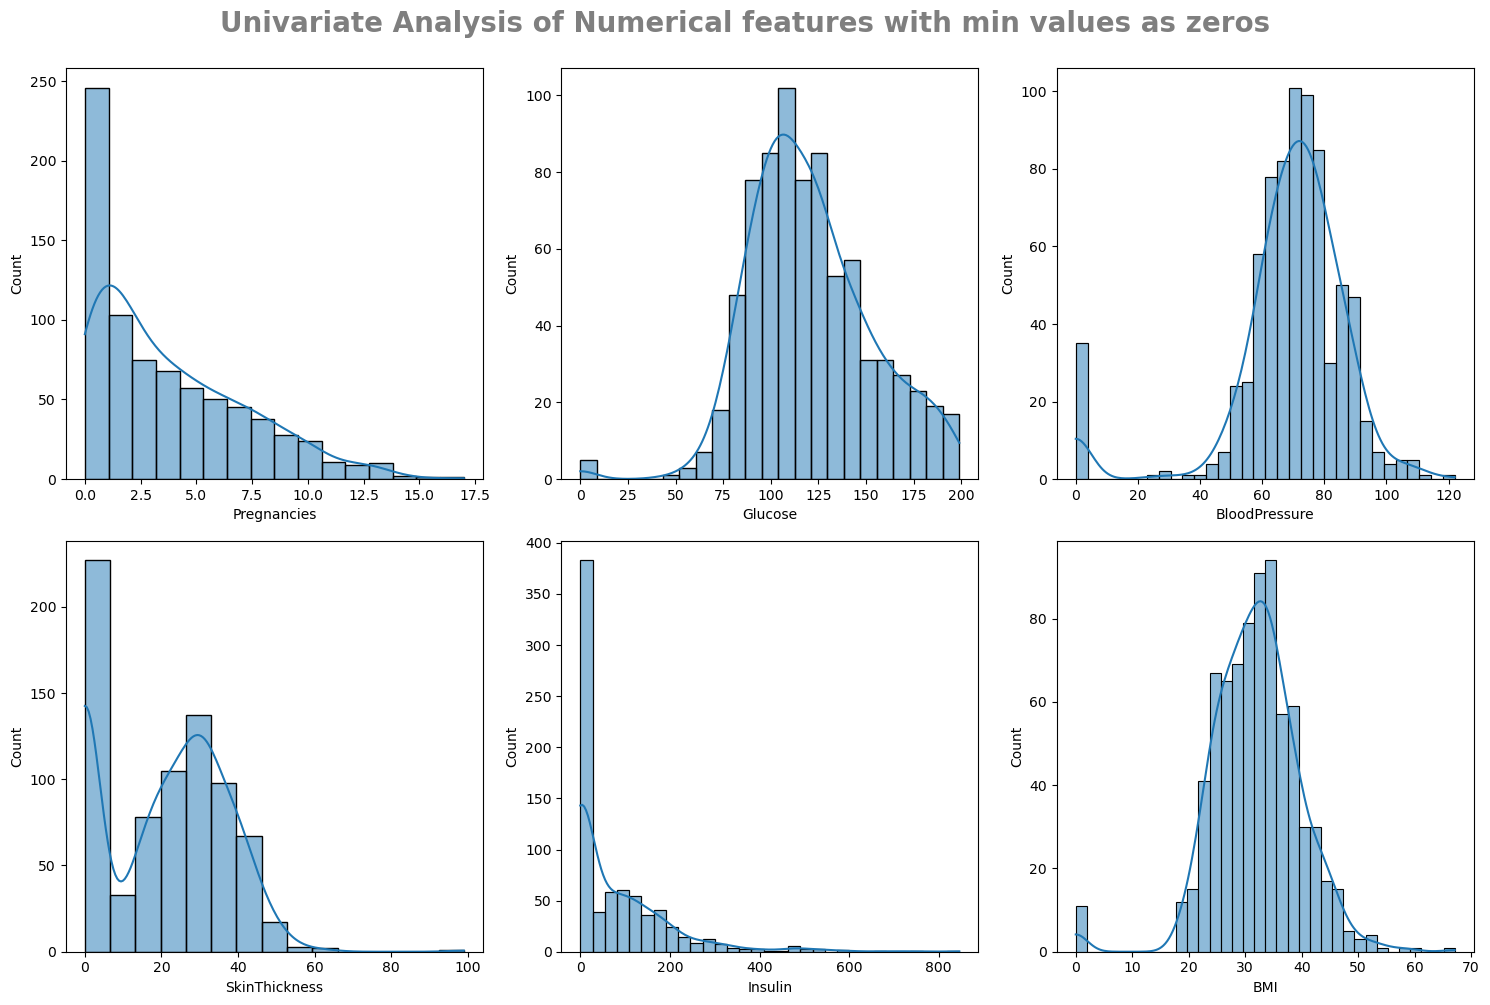

In [12]:
plt.figure(figsize=(15, 10)) 
plt.suptitle('Univariate Analysis of Numerical features with min values as zeros', fontsize=20, fontweight="bold", alpha=0.5, y=1.)

for i in range(0, len(Features_min_zero)):
    plt.subplot(2, 3, i+1)
    sns.histplot(x=df[Features_min_zero[i]], kde=True)
    plt.xlabel(Features_min_zero[i])
    plt.tight_layout()

We can see Glucose, BloodPressure and BMI have few number of 0 value, where as Pregnancies, SkinThickness and Insulin and  have very higher number of 0 values.

**Replacing 0 with NaN**

In [13]:
df.replace({'Pregnancies':0, 'Glucose':0, 'BloodPressure':0, 'SkinThickness':0, 'Insulin':0,'BMI':0}, np.nan, inplace=True)

Handling missing values
In this dataset, missing values are typically encoded as 0 for some features, which is not realistic.
We can replace these values with NaN and handle them appropriately, e.g., by imputing the mean or median.

**Calculating percentage of missing values in these features**

In [14]:
df.isnull().sum() * 100 / df.shape[0]

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

It can be seens that Glucose, BloodPressure and BMI has almost normal distribution if missing values are ignored, so hear mean imputation should be ok.  Pregnancies, SkinThickness and Insulin have bit skewness, so median imputation can be used.

**Imputing features with mean**

In [15]:
fea_mean_impu=['Glucose', 'BloodPressure','BMI']

# mean imputation
for i in fea_mean_impu:
    df[i].fillna(df[i].mean(), inplace = True)

**Imputing features with mean**

In [16]:
fea_median_impu=['Pregnancies', 'SkinThickness','Insulin']

# mean imputation
for i in fea_median_impu:
    df[i].fillna(df[i].mean(), inplace = True)

**Percentage of missing values after mean and median imputation**

In [17]:
df.isnull().sum() * 100 / df.shape[0]

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

**Density plots for all attributes to visualize the distribution of each attribute**

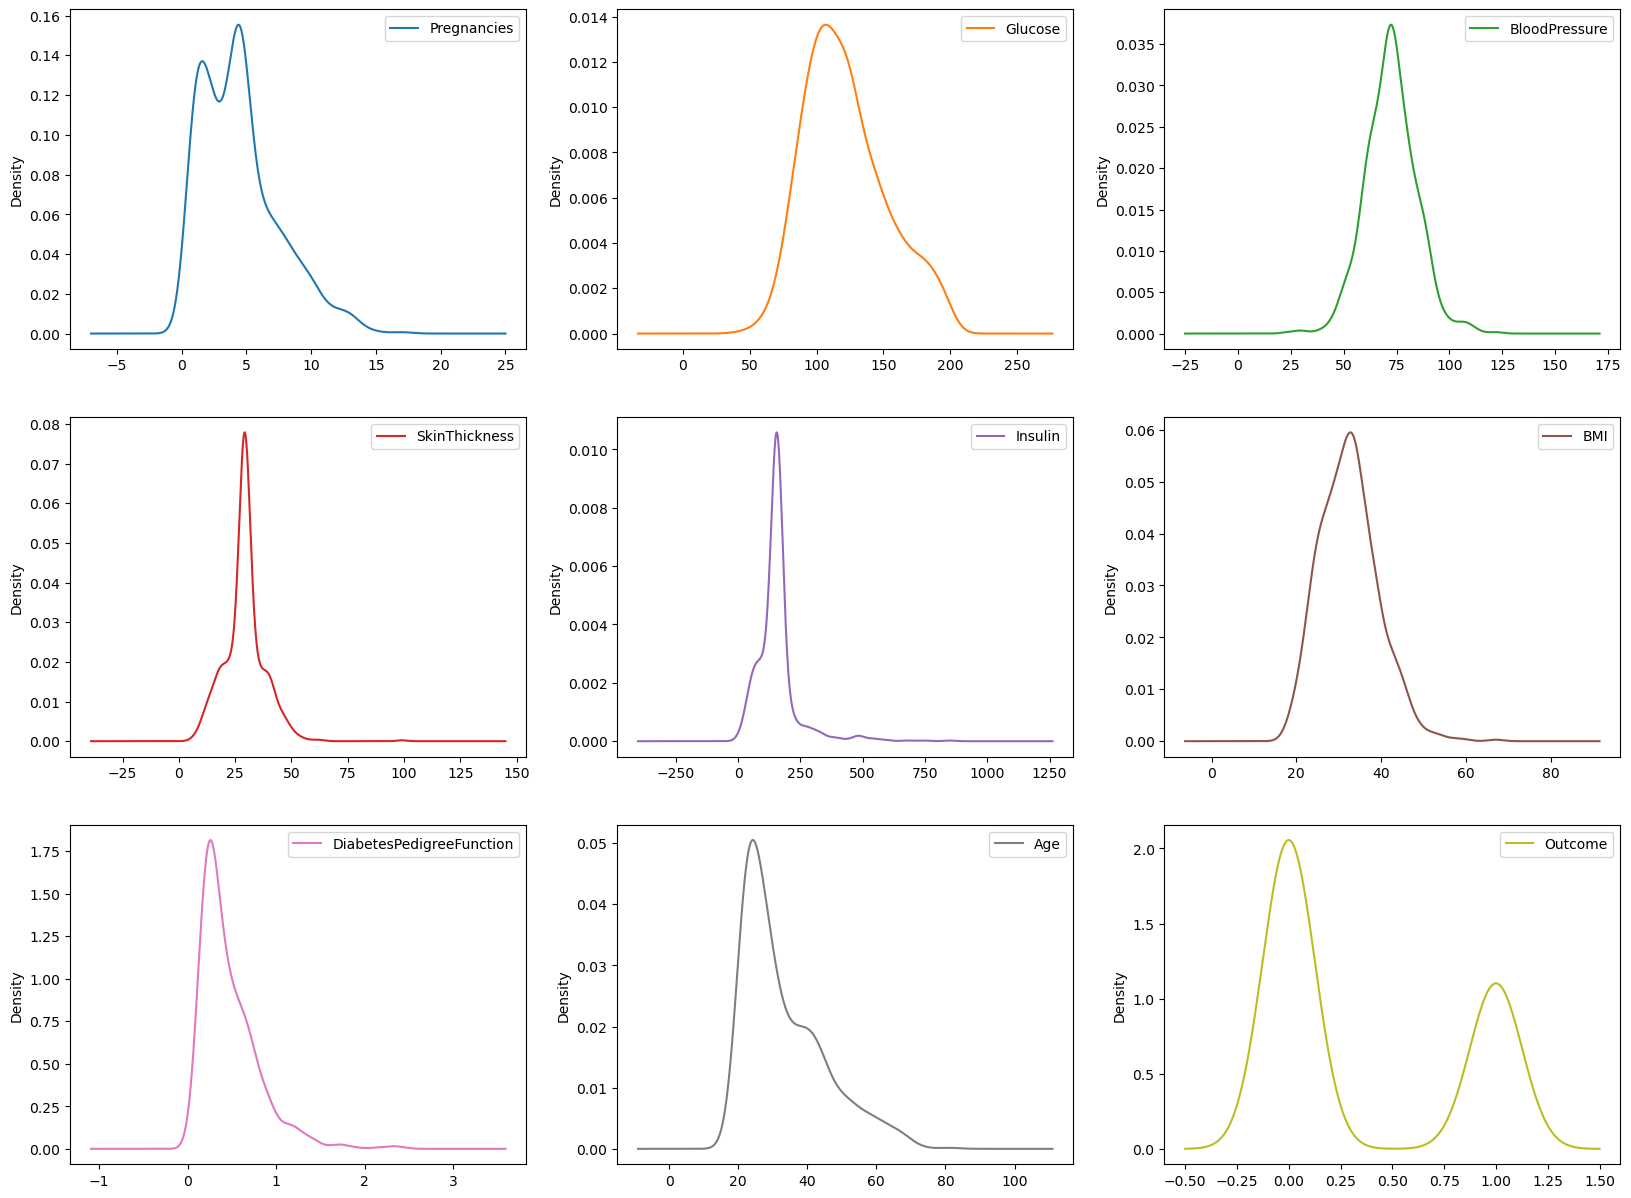

In [18]:
df.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

**Covariance of features**

In [19]:
df.cov() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,8.852974,13.972346,9.326000,3.447930,17.221470,2.262257,-0.005578,17.903750,0.352315
Glucose,13.972346,926.346983,80.394788,51.636823,1087.239699,48.324859,1.382151,95.401356,7.155569
BloodPressure,9.326000,80.394788,146.321591,20.503705,74.579607,23.391407,-0.011075,46.175523,0.958140
SkinThickness,3.447930,51.636823,20.503705,77.280660,118.195534,32.782007,0.294084,13.219905,0.902718
Insulin,17.221470,1087.239699,74.579607,118.195534,7228.588766,97.375072,2.778511,136.715802,8.694564
BMI,2.262257,48.324859,23.391407,32.782007,97.375072,47.267706,0.349435,2.063312,1.022835
DiabetesPedigreeFunction,-0.005578,1.382151,-0.011075,0.294084,2.778511,0.349435,0.109779,0.130772,0.027472
Age,17.903750,95.401356,46.175523,13.219905,136.715802,2.063312,0.130772,138.303046,1.336953
Outcome,0.352315,7.155569,0.958140,0.902718,8.694564,1.022835,0.027472,1.336953,0.227483


**Correlation of features**

In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.154290,0.259117,0.131819,0.068077,0.110590,-0.005658,0.511662,0.248263
Glucose,0.154290,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.259117,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.131819,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.068077,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.110590,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.005658,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.511662,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.248263,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


**Pairplots of features**

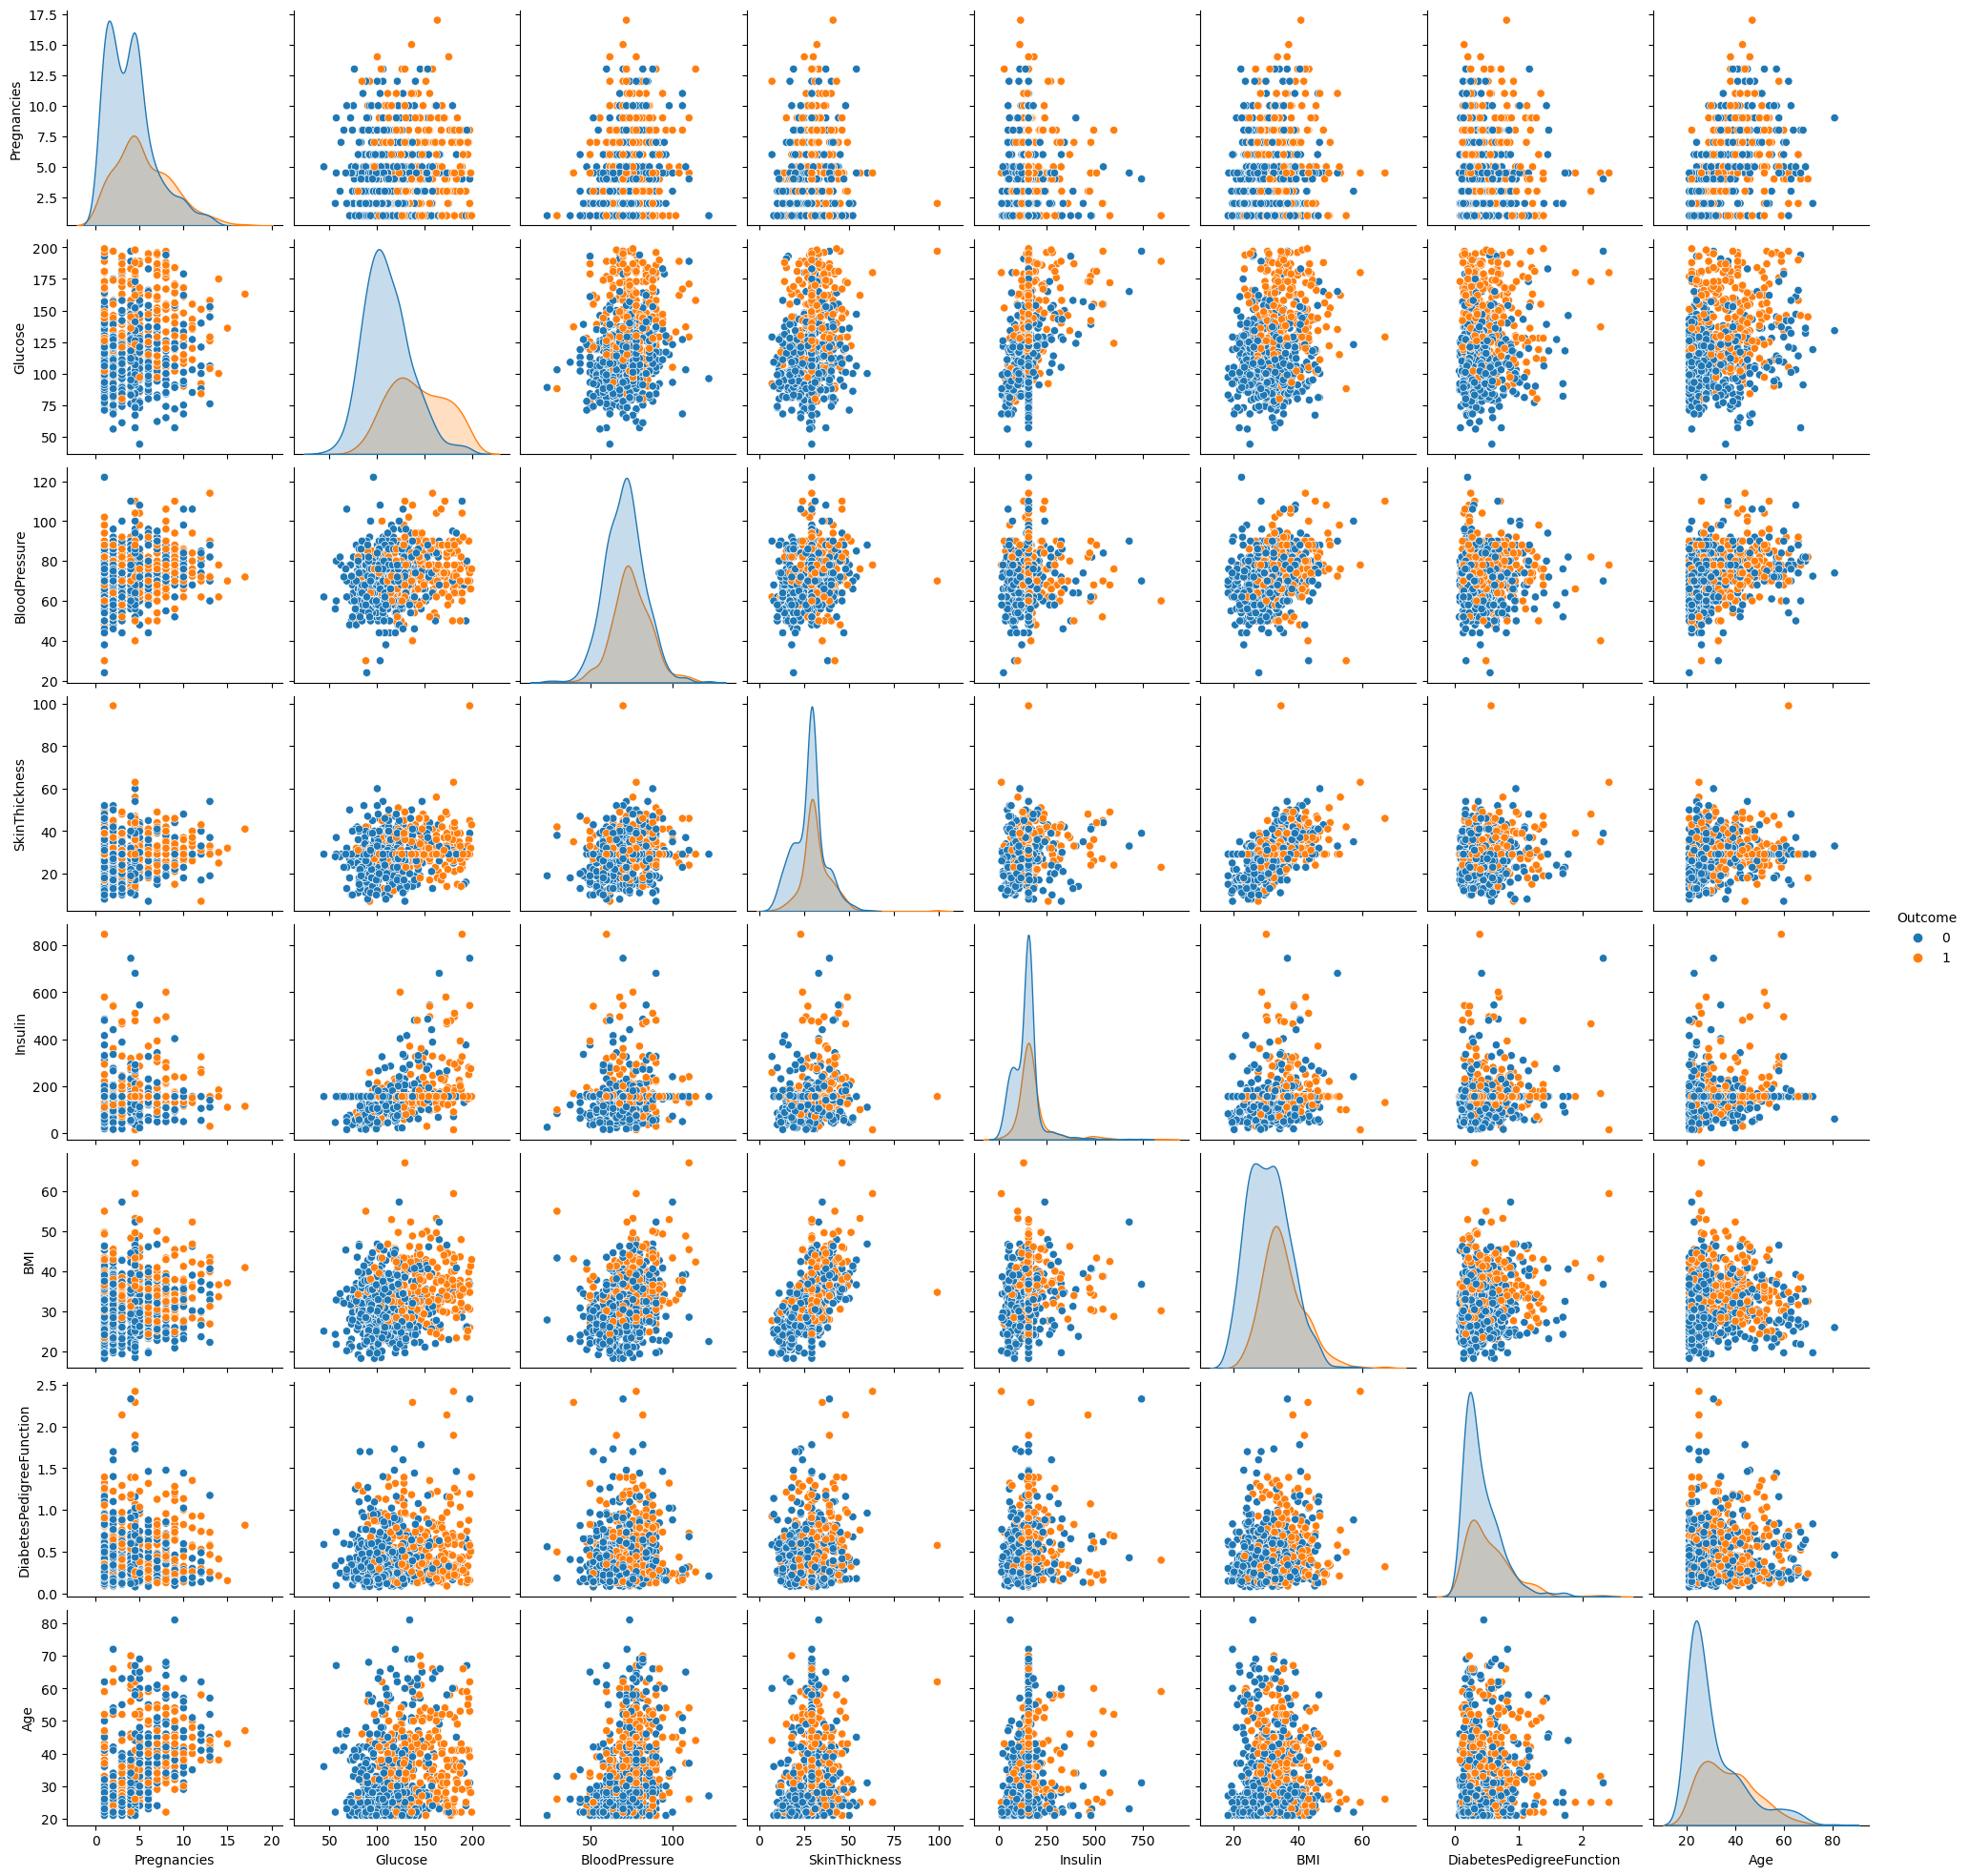

In [21]:
sns.pairplot(df,hue='Outcome')

**Heatmap of features**

<Axes: >

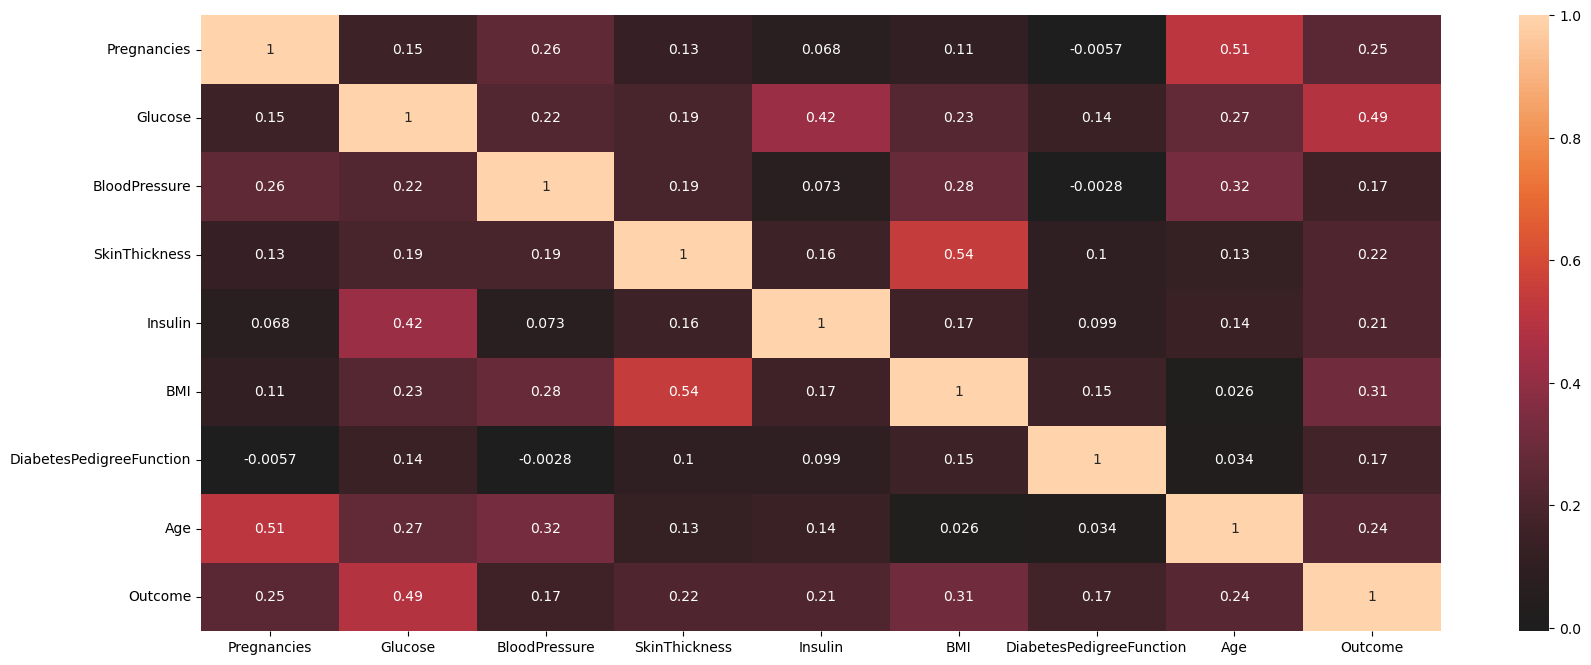

In [22]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, center=0)

It can be observed that there is no good correlation between the features. And the highest correlation here is of SkinThickness and BMI which is 0.54.

**Boxplot to check for outliers**

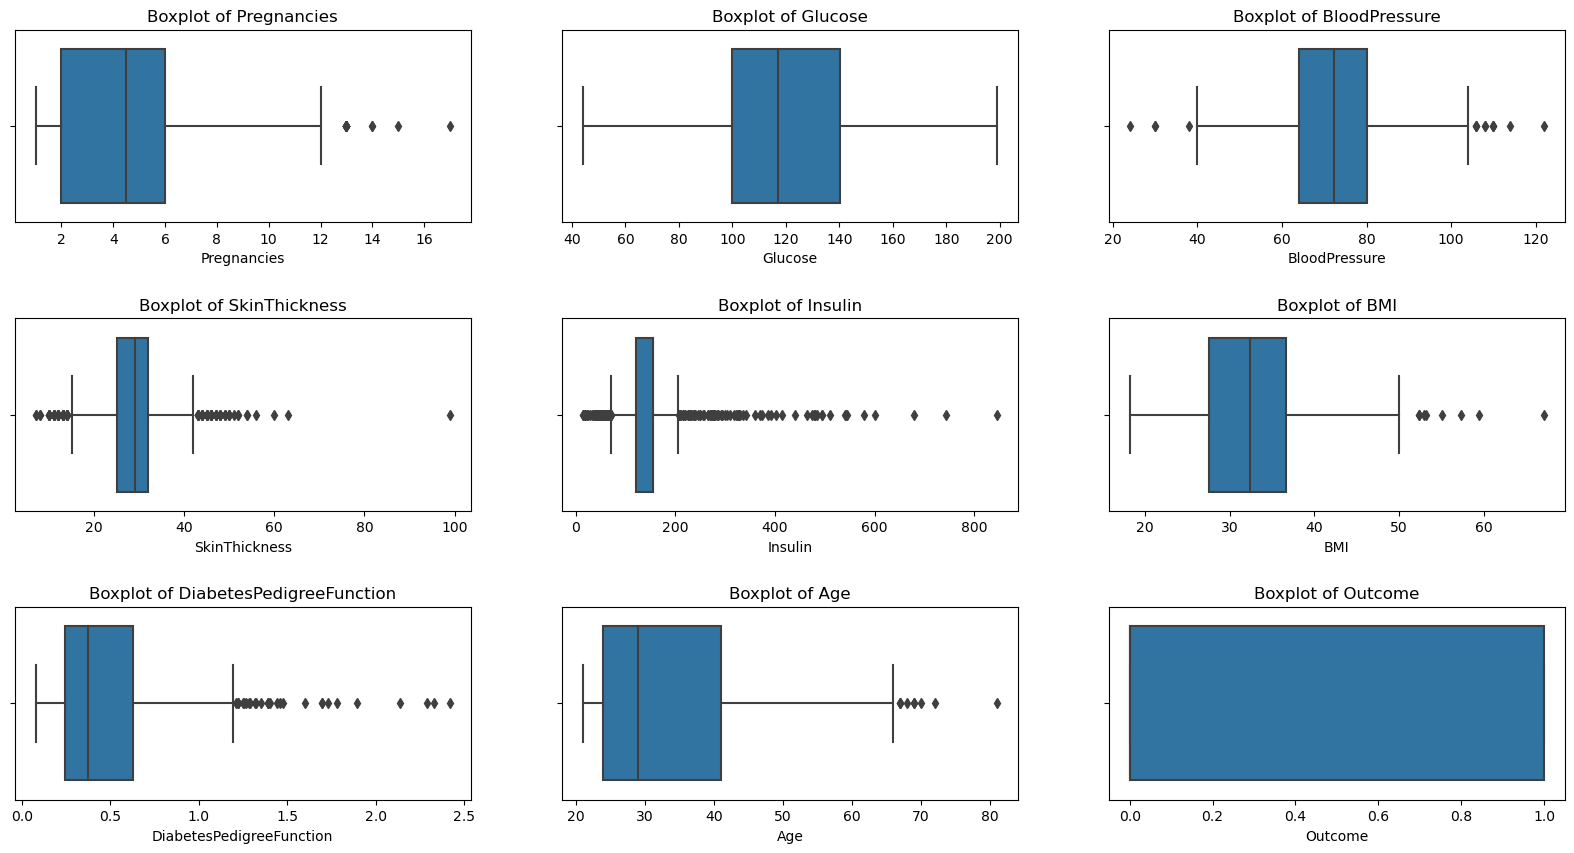

In [23]:
# Create a 3x3 grid of boxplots
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)

# Enumerate the first 9 columns of df (assuming there are at least 9 columns)
for i, column in enumerate(df.columns[:9]):
    sns.boxplot(x=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Boxplot of {column}')
    axes[i // 3, i % 3].set_xlabel(column)

# Hide any empty subplots if there are fewer than 9 columns
for i in range(len(df.columns), 9):
    fig.delaxes(axes.flatten()[i])

plt.show()


It can be seen that Glucose has no outliers. Pregnancies, BloodPressure, BMI, and Age have a few outliers. And SkinThickness, Insulin, and DiabetesPedigreeFunction have more outliers 

**Features that have outliers**

In [24]:
Features_with_outliers=['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

**Counting the outliers using the IQR method**

In [25]:
def count_outliers_iqr(data, multiplier=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    total = data[(data < lower_bound) | (data > upper_bound)].count()
   
    return total,lower_bound,upper_bound

In [26]:
for i in Features_with_outliers:
    outlier_count,lower_bound,upper_bound = count_outliers_iqr(df[i])
    print(f" | Outliers {i} : {outlier_count} \n | Lower bound: {lower_bound} \n | Upper bound: {upper_bound}")
    print("-----------------------------------")

 | Outliers Pregnancies : 14 
 | Lower bound: -4.0 
 | Upper bound: 12.0
-----------------------------------
 | Outliers BloodPressure : 14 
 | Lower bound: 40.0 
 | Upper bound: 104.0
-----------------------------------
 | Outliers SkinThickness : 87 
 | Lower bound: 14.5 
 | Upper bound: 42.5
-----------------------------------
 | Outliers Insulin : 164 
 | Lower bound: 70.42766497461929 
 | Upper bound: 206.62055837563452
-----------------------------------
 | Outliers BMI : 8 
 | Lower bound: 13.849999999999998 
 | Upper bound: 50.25
-----------------------------------
 | Outliers DiabetesPedigreeFunction : 29 
 | Lower bound: -0.32999999999999996 
 | Upper bound: 1.2
-----------------------------------
 | Outliers Age : 9 
 | Lower bound: -1.5 
 | Upper bound: 66.5
-----------------------------------


**Removing the outliers using IQR method**

In [27]:
def remove_outliers_iqr(data):
    """
    Remove outliers from a numeric dataset using the IQR method.

    Parameters:
    data (list or numpy array): The dataset from which outliers need to be removed.

    Returns:
    cleaned_data (list or numpy array): The dataset with outliers removed.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))
   
    return data[(data >= lower_bound) & (data <= upper_bound)]


**Loop through all columns that have outliers and remove outliers**

In [28]:
for column in Features_with_outliers:
    df[column] = remove_outliers_iqr(df[column])

**Boxplot after removal of outliers**

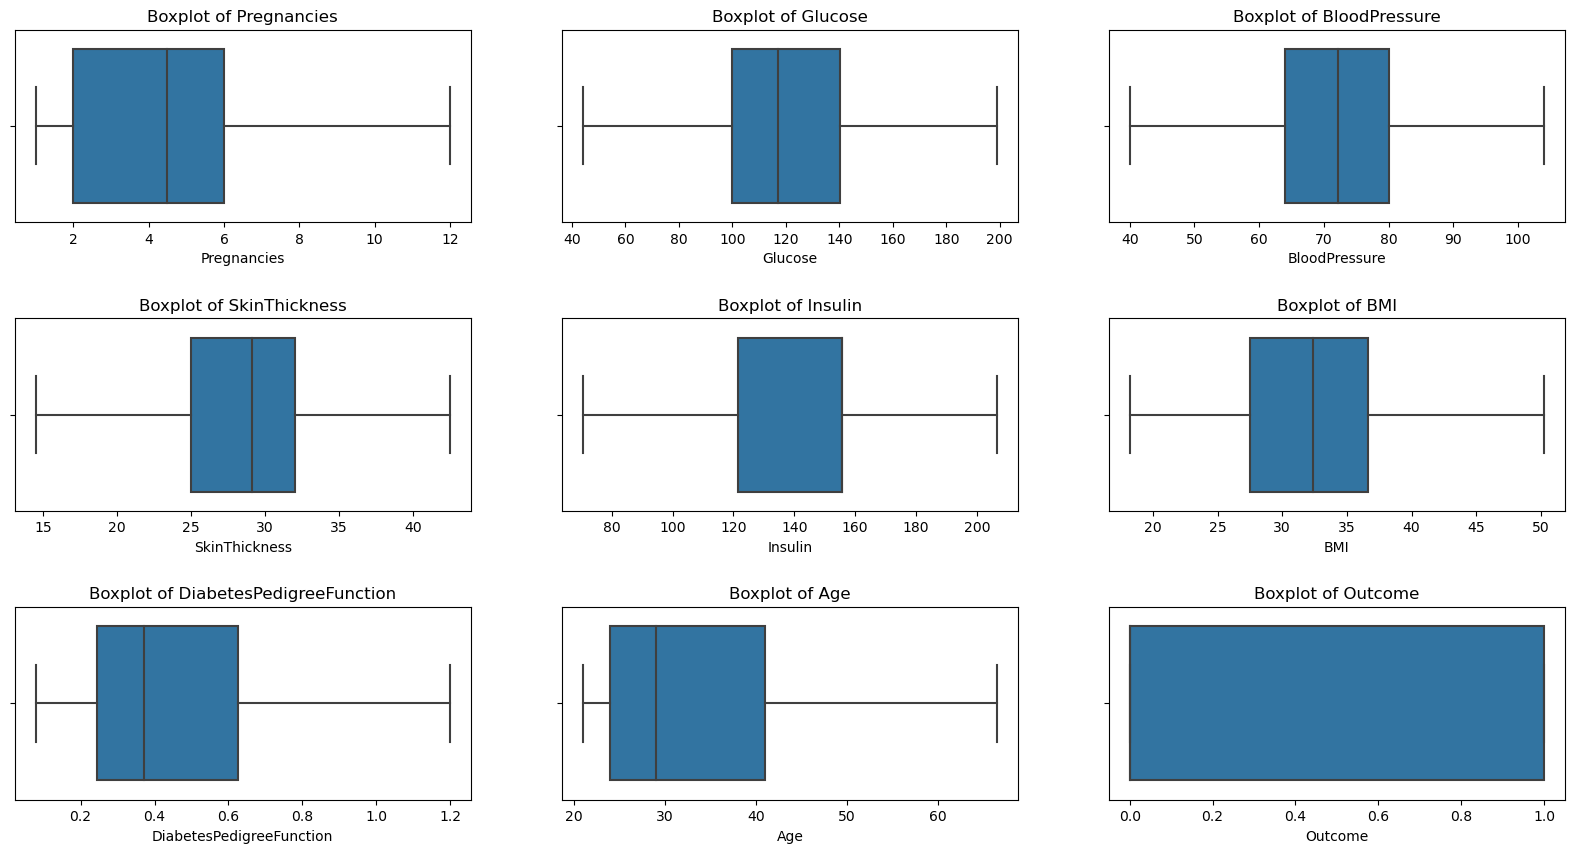

In [29]:
# Create a 3x3 grid of boxplots
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)

# Enumerate the first 9 columns of df (assuming there are at least 9 columns)
for i, column in enumerate(df.columns[:9]):
    sns.boxplot(x=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Boxplot of {column}')
    axes[i // 3, i % 3].set_xlabel(column)

# Hide any empty subplots if there are fewer than 9 columns
for i in range(len(df.columns), 9):
    fig.delaxes(axes.flatten()[i])

plt.show()


**Coutplot for the target feature**

<Axes: xlabel='Outcome', ylabel='count'>

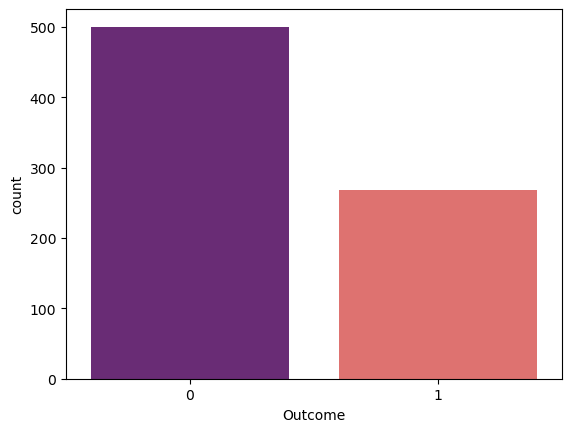

In [30]:
sns.countplot(data=df,x='Outcome',palette=("magma"))

**Split the data into features and target**

In [31]:
X = df.drop(columns=['Outcome'])  # Drop the 'target' column to get the features
y = df['Outcome']  # Scelect only the 'target' column as the target variable

In [32]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,155.548223,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,155.548223,26.6,0.351,31.0


In [33]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

**Let's see how data is distributed for every column wrt target feature**

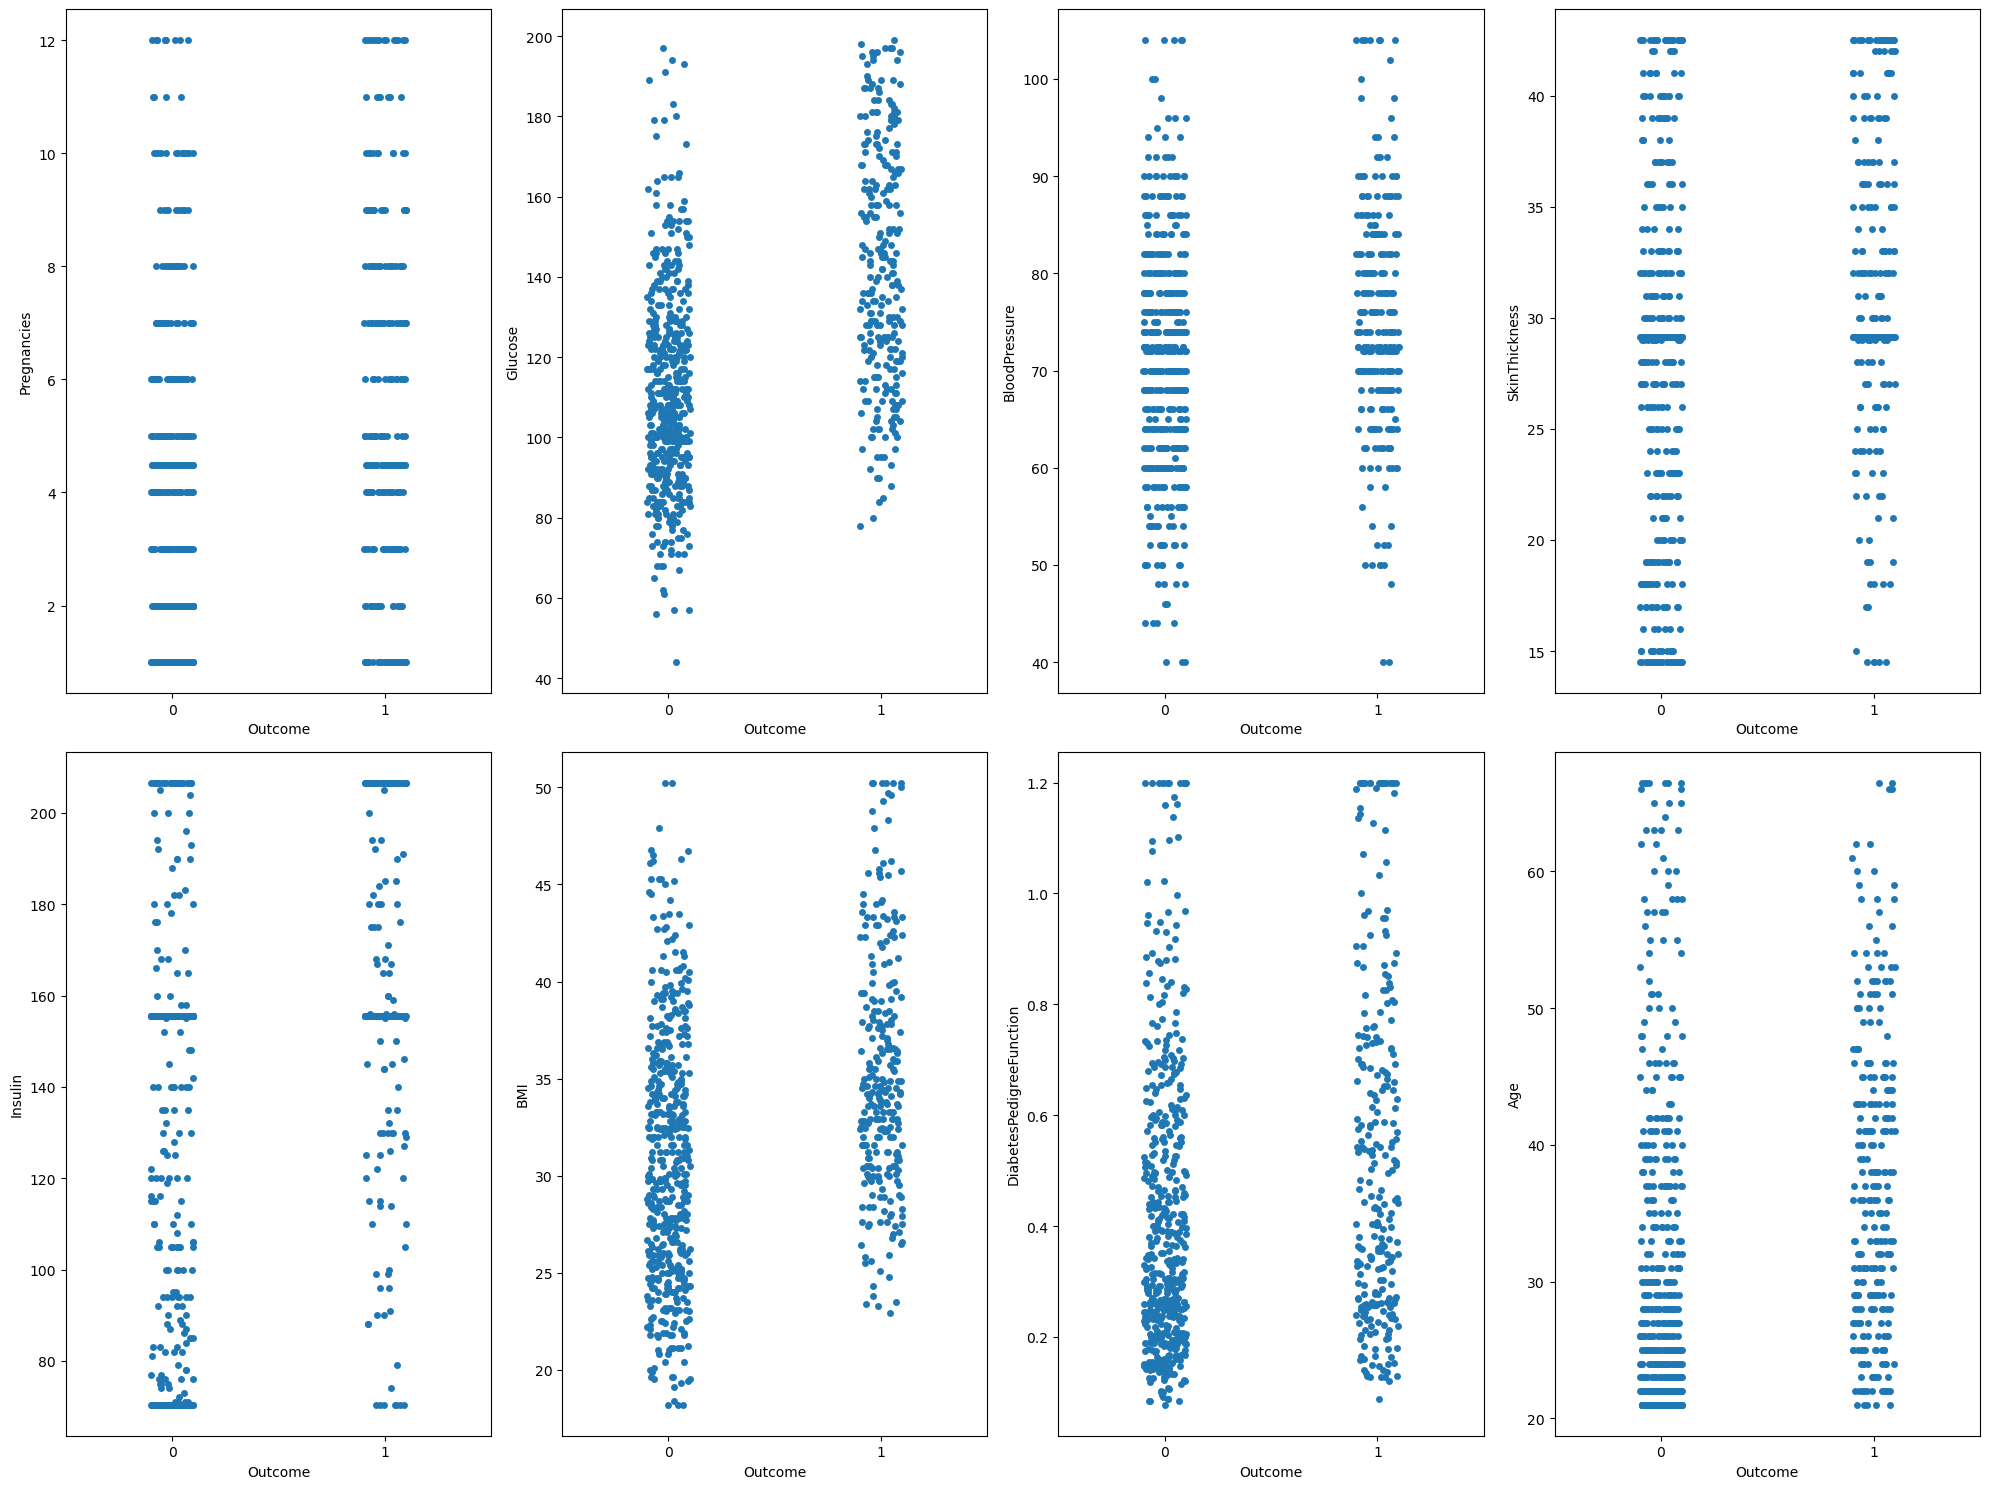

In [34]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(2,4,plotnumber)
        sns.stripplot(x=y,y=X[column])
    plotnumber+=1
plt.tight_layout()

**Train Test split**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

**Scaling the features**

In [36]:
from sklearn.preprocessing import StandardScaler

# Create a MinMaxScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

**Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_reg = LogisticRegression()

In [39]:
log_reg.fit(X_train,y_train)

LogisticRegression()

**Let's see how well our model performs on the test data set**

In [40]:
y_pred = log_reg.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

**Accuracy**

In [42]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


**Confusion Matrix**

In [43]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[142,  20],
       [ 43,  49]], dtype=int64)

In [44]:
true_positive = conf_mat[0][0]
print(true_positive)

false_positive = conf_mat[0][1]
print(false_positive)

false_negative = conf_mat[1][0]
print(false_negative)

true_negative = conf_mat[1][1]
print(true_negative)

142
20
43
49


**Creating a heatmap for the confusion matrix**

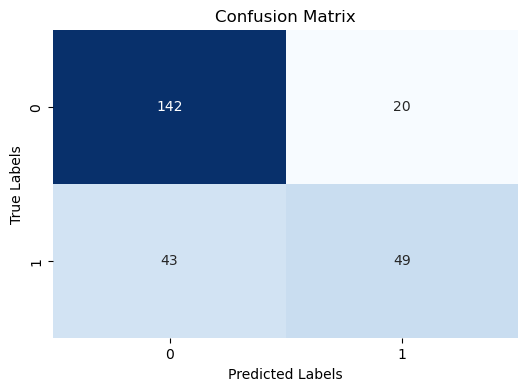

In [45]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

**Precision**

In [46]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")

Precision: 0.75


**Recall**

In [47]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

Recall: 0.75


**F-Beta**

In [48]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.74


In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

**AUC - Area Under Curve**

In [50]:
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {f1:.2f}")

AUC: 0.74


As AUC value is 0.74 we can conclude that model had good measure of separability

**ROC - Receiver Operating Characteristic**

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

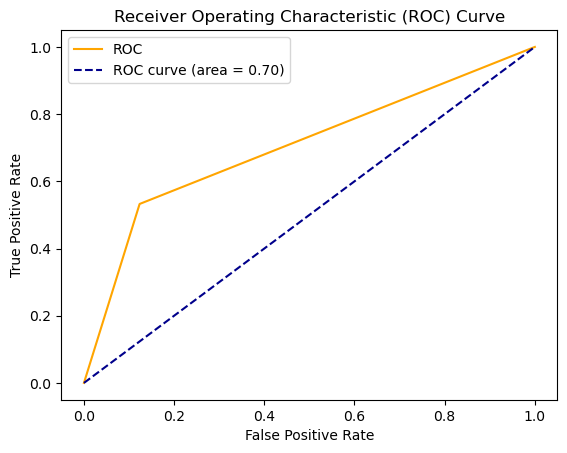

In [52]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()